<a href="https://colab.research.google.com/github/thecont1/class-sharing/blob/main/Class11_DataViz02_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Viz 2

---

## Content

- Bivariate Data Visualization
- Continous-Continuous
  - Line plot
  - Styling and Labelling
  - Scatter plot
- Categorical-Categorical
  - Dodged countplot
  - Stacked countplot
- Categorical-Continuous
  - Boxplot
  - Bar plot
- Subplots

---

## Bivariate Data Visualization

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('datasets/final_vg.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [17]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16652.000000,16381.000000,16652.000000,16652.000000,16652.000000,16652.000000,16652.000000
mean,8283.409620,2006.390513,2.752314,1.996875,2.499677,1.151829,8.457873
std,4794.471477,5.863261,1.327002,1.322972,1.164023,1.054813,3.717756
min,1.000000,1980.000000,0.140000,0.010000,0.000000,-0.474276,0.240000
25%,4129.750000,2003.000000,1.781124,1.087977,1.781124,0.394830,5.580341
50%,8273.500000,2007.000000,2.697415,1.714664,2.480356,0.491870,7.536614
75%,12436.250000,2010.000000,3.677290,2.795123,3.176299,1.781124,11.227334
max,16600.000000,2020.000000,8.725452,8.367985,12.722984,7.358020,30.555862


---

#### Continuous-Continuous

So far we have been analyzing only a single feature.

But what if we want to visualize two features at once?

**What kind of questions can we ask regarding a continuous-continuous pair of features?**

- Show relation between two features, like **how does the sales vary over the years**?
- Show **how are the features associated, positively or negatively**?

...and so on

---

### Line Plot

**How can we plot the sales trend over the years for the longest running game?**

First, let's find the longest running game first.

In [18]:
game_life = data.groupby('Name').agg(min_year = ('Year', 'min'), max_year = ('Year', 'max'))
game_life['range'] = game_life['max_year'] - game_life['min_year']
game_life.sort_values(['range'], ascending = False)[:5]

,min_year,max_year,range
Name,,,
Ice Hockey,1980.0,2020.0,40.0
Baseball,1980.0,2019.0,39.0
Battlezone,1982.0,2006.0,24.0
Romance of the Three Kingdoms II,1991.0,2015.0,24.0
Bomberman,1985.0,2008.0,23.0


Great! So `Ice Hockey` is longer running than most of the games.

Let's try to find the sales trend in North America of the same across the years.

<Axes: xlabel='Year', ylabel='NA_Sales'>

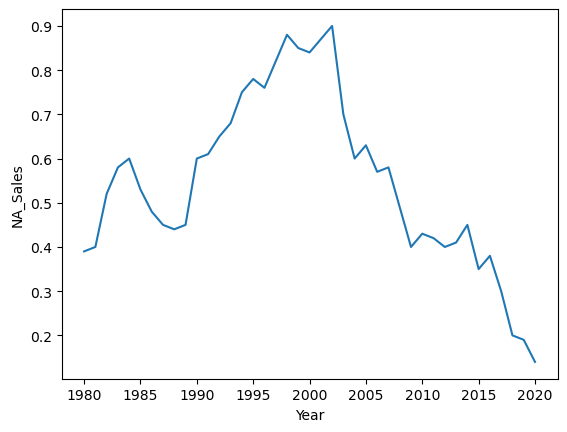

In [19]:
ih = data.loc[data['Name']=='Ice Hockey']
sns.lineplot(x='Year', y='NA_Sales', data=ih)

**What can we infer from this graph?**

- The sales across North America seem to have been boosted in the years of 1995-2005.
- Post 2010 though, the sales seem to have taken a dip.

Line plots are great for representing trends such as above, over time.

#### Style and Labelling

We already learnt how to add **titles, x-label and y-label** in barplot.

Let's do the same here.

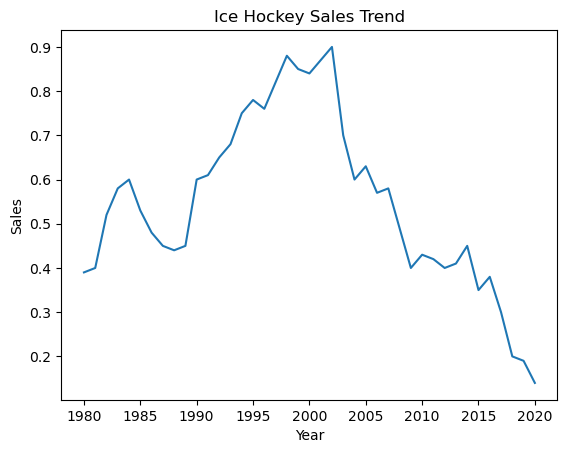

In [20]:
plt.title('Ice Hockey Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
sns.lineplot(x='Year', y='NA_Sales', data=ih)
plt.show()

**What if we want to change the colour of the curve?**

- `sns.lineplot()` contains an argument **color**
- It takes a matplotlib color or string for some defined colours.
  - black: `k`/ `black`
  - red: `r`/`red`

**But what all colours can we use?**

- Matplotlib provides a variety of colors.
- Check the documentation for more - https://matplotlib.org/2.0.2/api/colors_api.html

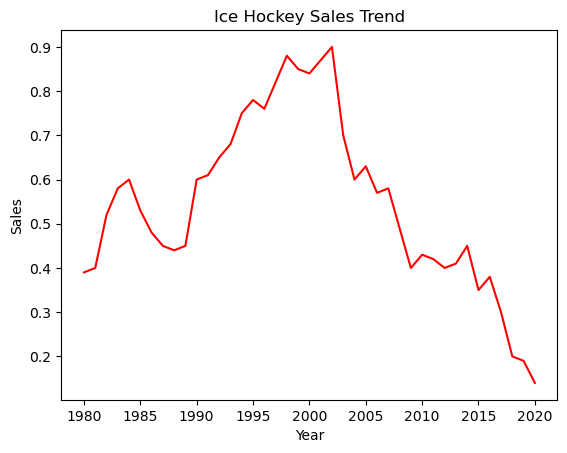

In [21]:
plt.title('Ice Hockey Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
sns.lineplot(x='Year', y='NA_Sales', data=ih, color='r')
plt.show()

Now, let's say we only want to show the values from years 1990-2000.

**How can we limit our plot to only the last decade of 20th century?**

- This requires changing the range of x-axis.
  
**But how can we change the range of an axis in matplotlib?**

We can use:
- `plt.xlim()`: x-axis
- `plt.ylim()`: y-axis

These functions take 2 arguments:
1. `left`: Starting point of range
2. `right`: End point of range

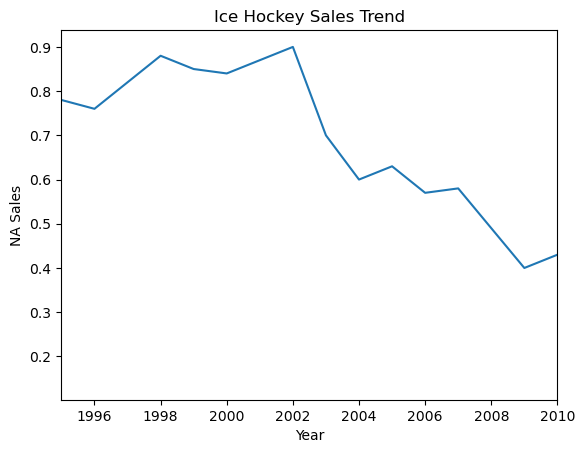

In [22]:
plt.title('Ice Hockey Sales Trend')
plt.xlabel('Year')
plt.ylabel('NA Sales')
plt.xlim(left=1995,right=2010)
sns.lineplot(x='Year', y='NA_Sales', data=ih)
plt.show()

So far we have visualised a single plot to understand it.

**What if we want to compare it with some other plot?**

Say, we want to compare the same sales trend between two games.
- Ice Hockey
- Baseball

Let's first plot the trend for "Baseball".

<Axes: xlabel='Year', ylabel='NA_Sales'>

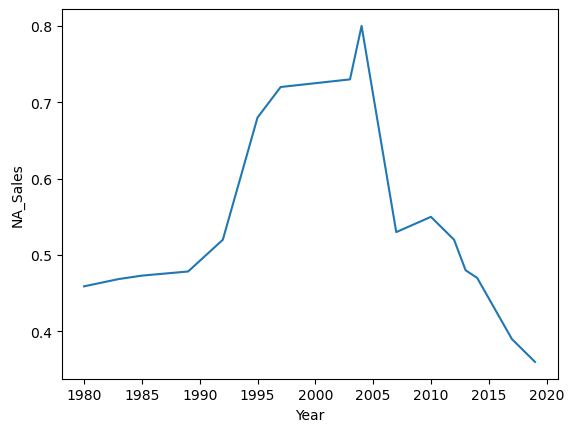

In [23]:
baseball = data.loc[data['Name']=='Baseball']
sns.lineplot(x='Year', y='NA_Sales', data=baseball)

Now for the comparison, we will have to draw these plots in the same figure.

**How can we plot multiple plots in the same figure?**

<Axes: xlabel='Year', ylabel='NA_Sales'>

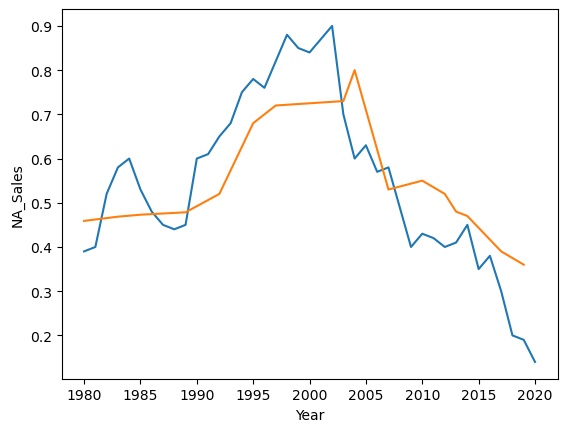

In [24]:
sns.lineplot(x='Year', y='NA_Sales', data=ih)
sns.lineplot(x='Year', y='NA_Sales', data=baseball)

We can use multiple `sns.lineplot()` functions.

Observe that Seaborn automatically created 2 plots with **different colors**.

**But how can we know which colour is of which plot?**

- We can simply set the label of each plot.
- `sns.lineplot()` has another argument **label** to do so.

<Axes: xlabel='Year', ylabel='NA_Sales'>

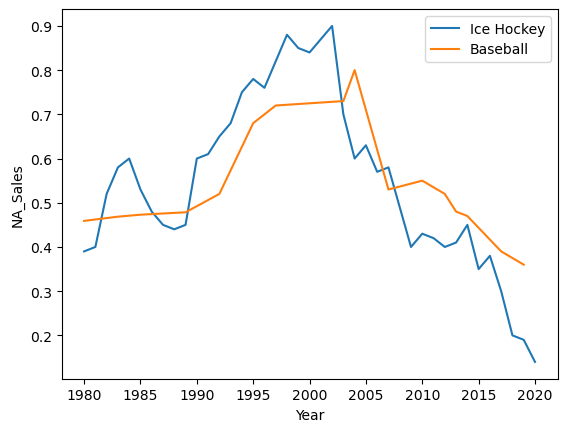

In [25]:
sns.lineplot(x='Year', y='NA_Sales', data=ih, label='Ice Hockey')
sns.lineplot(x='Year', y='NA_Sales', data=baseball, label='Baseball')

We can also pass these labels in `plt.legend()` as a list in the order the plots are created.

Please note that using labels in `plt.legend()` gives unexpected result in **Google Colab**. However, it works absolutely fine on other platforms.

Here, we will use `plt.legend()` for its other functionalities.

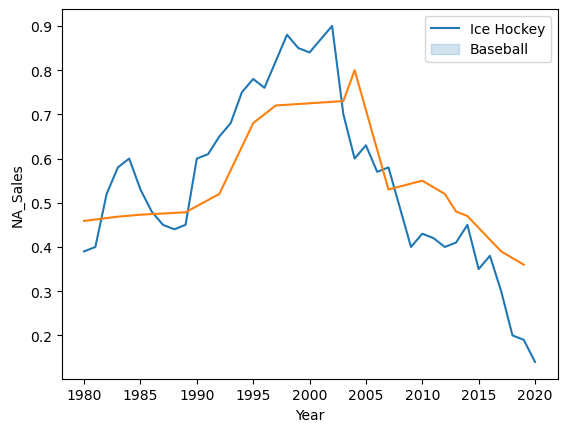

In [26]:
sns.lineplot(x='Year', y='NA_Sales', data=ih)
sns.lineplot(x='Year', y='NA_Sales', data=baseball)
plt.legend(['Ice Hockey','Baseball'])
plt.show()

**Can we change the position of the legend, say to bottom-right corner?**

- Matplotlib automatically decides the best position for the legends.
- But we can also change it using the `loc` parameter.
- `loc` takes input as 1 of following strings:
  - upper center
  - upper left
  - upper right
  - lower right

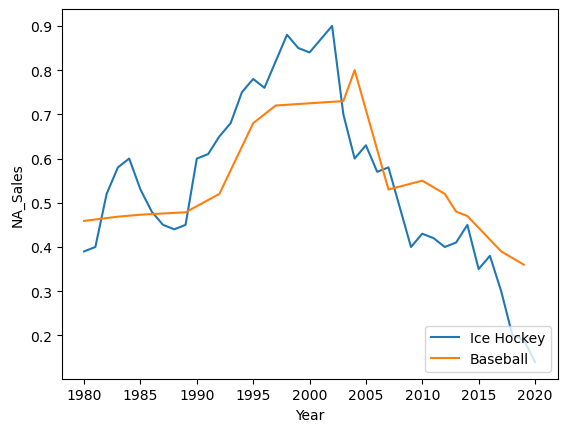

In [27]:
sns.lineplot(x='Year', y='NA_Sales', data=ih, label='Ice Hockey')
sns.lineplot(x='Year', y='NA_Sales', data=baseball, label='Baseball')
plt.legend(loc='lower right')
plt.show()

**What if we want the legend to be outside the plot?**

- Maybe the plot is too congested to show the legend.
- We can use the same `loc` parameter for this too.

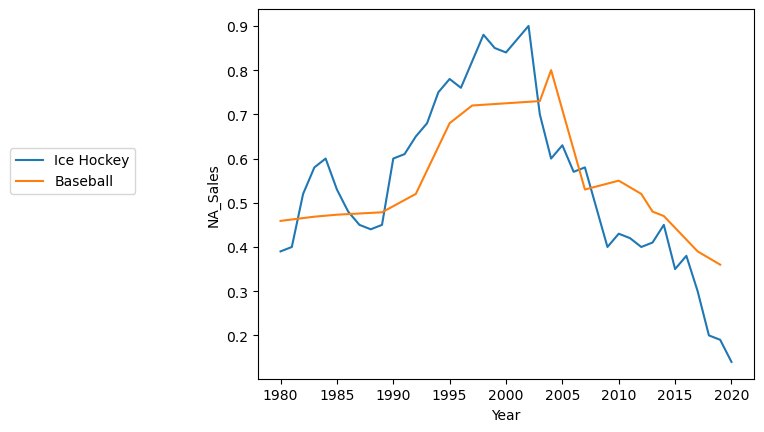

In [28]:
sns.lineplot(x='Year', y='NA_Sales', data=ih, label='Ice Hockey')
sns.lineplot(x='Year', y='NA_Sales', data=baseball, label='Baseball')
plt.legend(loc=(-0.5,0.5))
plt.show()

The pair of floats signify the `(x,y)` coordinates for the legend.

From this we can conclude that `loc` takes **two types of arguments**:
- The location in the **form of string**.
- The location in the **form of coordinates**.

\
**What if we want to add other stylings to legends?**

- Specify the **number of rows/cols**
  - Uses parameter `ncols` for this.
  - The number of **rows are decided automatically**.
    
- Decide if we want the box of legends to be displayed
  - Use the bool parameter `frameon`.

...and so on.

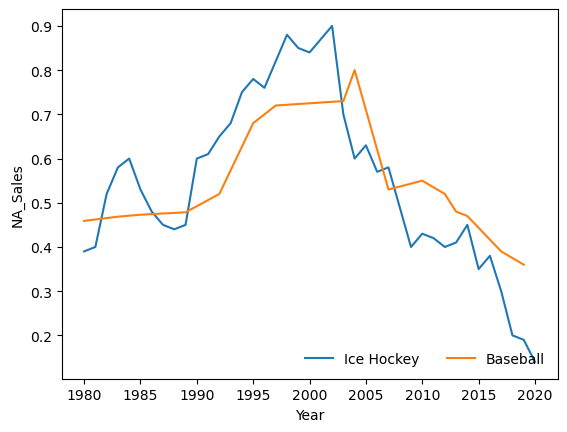

In [29]:
sns.lineplot(x='Year', y='NA_Sales', data=ih, label='Ice Hockey')
sns.lineplot(x='Year', y='NA_Sales', data=baseball, label='Baseball')
plt.legend(loc='lower right', ncol=2, frameon=False)
plt.show()

Now say we want to highlight a point on our curve.

**How can we highlight the maximum "Ice Hockey" sales across all years?**

Let's first find this point.

In [30]:
print(max(ih['NA_Sales']))

0.9


If we observe, this point lies in the year 2004-2005.

Now we need to add text to this point (2004,0.9)

**How can we add text to a point in a figure?**

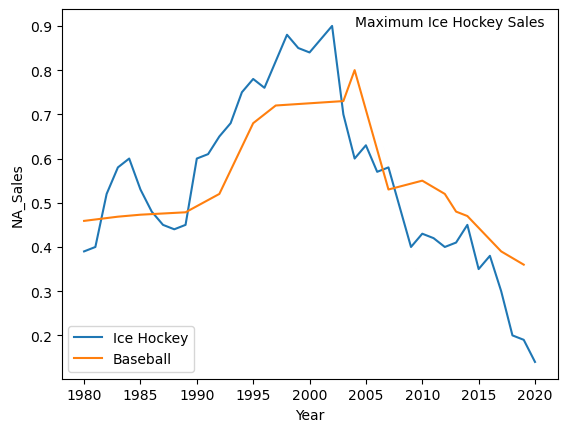

In [31]:
sns.lineplot(x='Year', y='NA_Sales', data=ih, label='Ice Hockey')
sns.lineplot(x='Year', y='NA_Sales', data=baseball, label='Baseball')
plt.legend(loc='lower left')
plt.text(2004,max(ih['NA_Sales']), 'Maximum Ice Hockey Sales')
plt.show()

By using `plt.text()`

- Pass in the **x and y coordinates** where we want the text to appear.
- Pass in the **text string**.

We can also use `plt.grid()` to show the grid layout in the background.

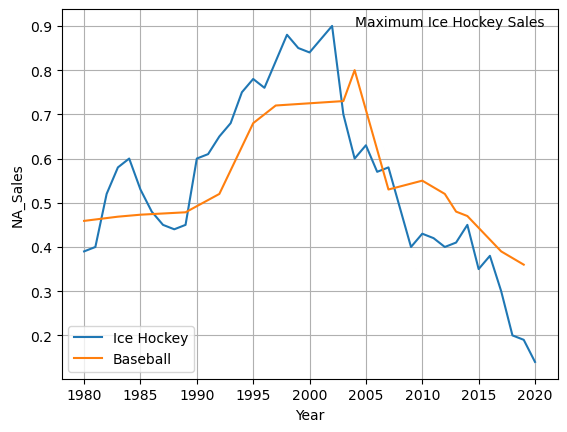

In [32]:
sns.lineplot(x='Year', y='NA_Sales', data=ih, label='Ice Hockey')
sns.lineplot(x='Year', y='NA_Sales', data=baseball, label='Baseball')
plt.legend(loc='lower left')
plt.text(2004, max(ih['NA_Sales']), 'Maximum Ice Hockey Sales')
plt.grid()
plt.show()

**Note:** We can pass in parameters inside `plt.grid()` to control its density, colour of grid lines, etc.

You can look it up later on how to customize the grid - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html

---

### Scatter Plot

Suppose we want to find the relation between `Rank` and `Sales` of all games.

**Are `Rank` and `Sales` positively or negatively correlated?**

In this case, unlike line plot, there maybe multiple points in y-axis for each point in x-axis.

In [33]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


**How can we plot the relation between `Rank` and `Global Sales`?**

Can we use lineplot? Let's try it out.

<Axes: xlabel='Rank', ylabel='Global_Sales'>

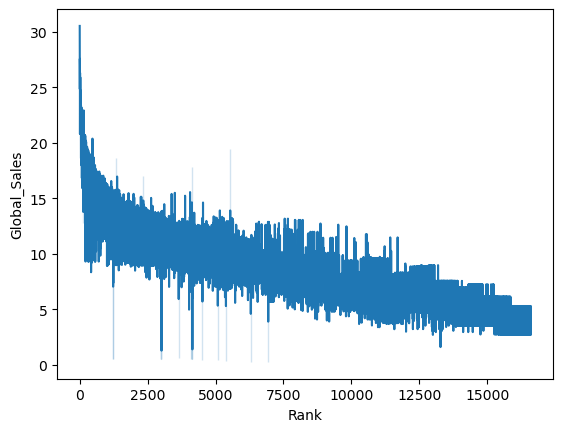

In [34]:
sns.lineplot(data=data, x='Rank', y='Global_Sales')

The plot itself looks very messy and it's hard to find any patterns from it.

**Is there any other way we can visualize this relation?**

- using `scatterplot()`

<Axes: xlabel='Rank', ylabel='Global_Sales'>

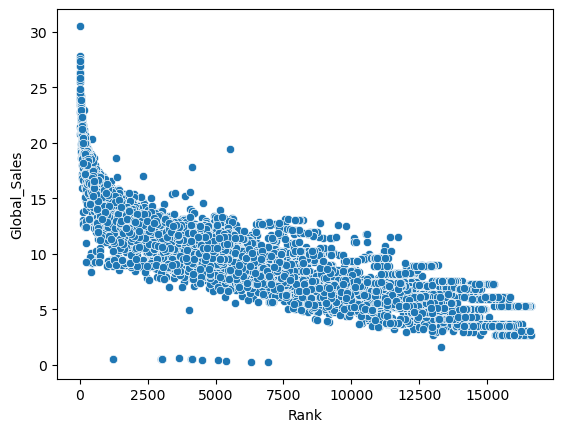

In [35]:
sns.scatterplot(data=data, x='Rank', y='Global_Sales')

Compared to lineplot, we are able to see the patterns and points more distinctly now!

Notice,
- The two variables are negatively correlated with each other.
- With increase in ranks, the sales tend to go down, implying lower ranked games have higher sales overall!

Scatter plots help us visualize these relations and find any patterns in the data.

Sometimes, people also like to display the linear trend between two variables - **Regression Plot**.

If you notice, `Genres`, `Publisher` and `Platform` are categorical values.

Since we have a lot of categories of each of them, we will use top 3 of each to make our analysis easier.

In [36]:
top3_pub = data['Publisher'].value_counts().index[:3]
top3_gen = data['Genre'].value_counts().index[:3]
top3_plat = data['Platform'].value_counts().index[:3]
top3_data = data.loc[(data["Publisher"].isin(top3_pub)) & (data["Platform"].isin(top3_plat)) & (data['Genre'].isin(top3_gen))]
top3_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257
...,...,...,...,...,...,...,...,...,...,...,...
16438,14938,Yes! Precure 5 Go Go Zenin Shu Go! Dream Festival,DS,2008.0,Action,Namco Bandai Games,1.087977,0.592445,1.087977,0.394830,3.509168
16479,10979,Young Justice: Legacy,PS3,2013.0,Action,Namco Bandai Games,2.186589,1.087977,3.409089,0.394830,7.359902
16601,11802,ZhuZhu Pets: Quest for Zhu,DS,2011.0,Misc,Activision,2.340740,1.525543,3.103825,0.394830,7.372592
16636,9196,Zoobles! Spring to Life!,DS,2011.0,Misc,Activision,2.697415,1.087977,2.760718,0.394830,6.915540


---

#### Categorical-Categorical

Earlier we saw how to work with continous-continuous pair of variables.

Now let's come to the second type of pair of i.e. **Categorical-Categorical**.

**What questions comes to your mind when we say categorical-categorical pair?**

Questions related to distribution of a category within another category.
- What is the **distribution of genres for top-3 publishers**?
- Which **platforms do these top publishers use?**

**Which plot can we use to show distribution of one category with respect to another?**

We can have can **have multiple bars for each category**

These multiple bars can be
- stacked together - **Stacked Countplot**
- placed next to each other - **Dodged Countplot**


---

### Dodged Countplot

**How can we compare the top 3 platforms these publishers use?**

- We can use a **dodged countplot** in this case.

Text(0, 0.5, 'Count of Games')

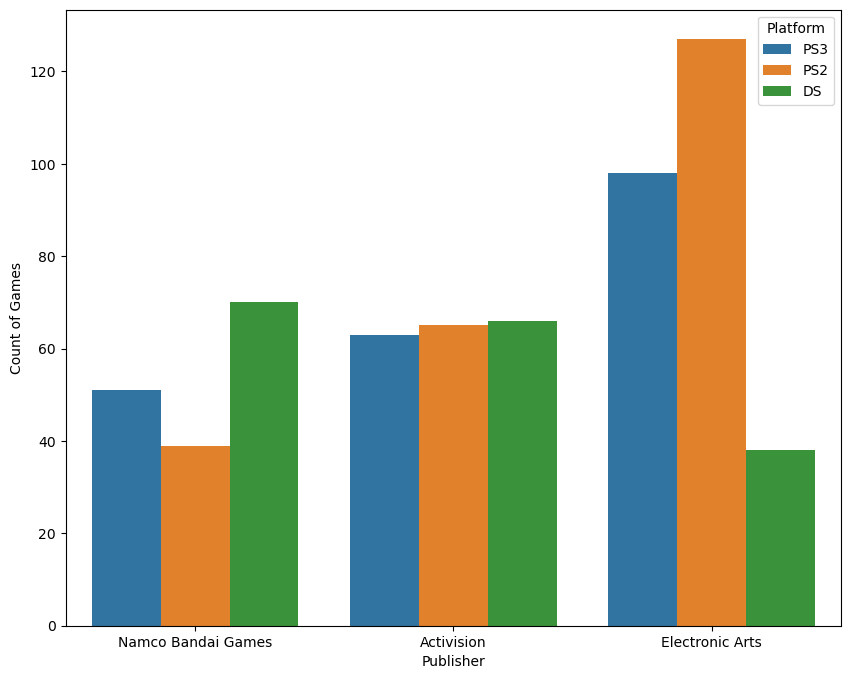

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(x='Publisher',hue='Platform',data=top3_data)
plt.ylabel('Count of Games')

**What can we infer from the dodged countplot?**

- EA releases PS2 games way more than any other publisher, or even platform!
- Activision has almost the same count of games for all 3 platforms.
- EA is leading in PS3 and PS2, but Namco leads when it comes to DS platform.

---

### Stacked Countplot

**How can we visualize the distribution of genres for top-3 publishers?**

- We can use a **stacked countplot** for this.



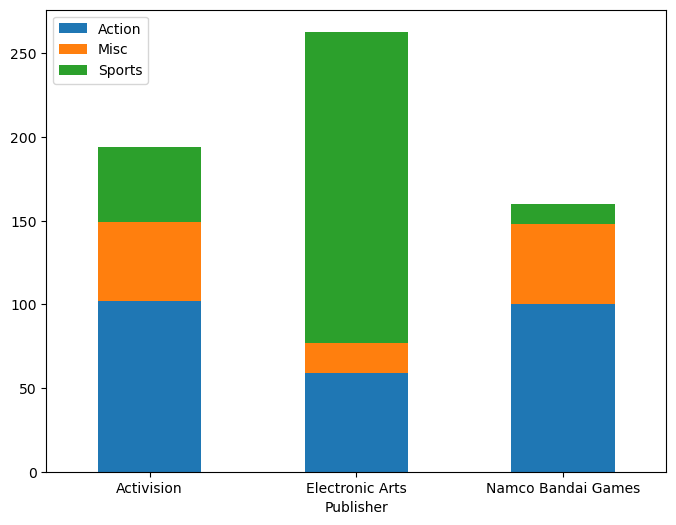

In [38]:
df_stacked_plot = pd.crosstab(index=top3_data['Publisher'], columns=top3_data['Genre'])

df_stacked_plot.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()

But stacked countplots can be misleading.

Some may find it difficult to understand if it starts from baseline
or from on top of the bottom area.

**How do we decide between a Stacked countplot and Dodged countlot?**

- Stacked countplots are a good way to represent totals.
- Dodged countplots helps us to comapare values between various categories, and within the category itself too.



---

#### Continous-Categorical

**What kind of questions we may have regarding a continuous-categorical pair?**

- We might to want calculate some numbers category-wise.
  - **What is the average sales for every genre?**
- We might be interested in checking the distribution of the data category-wise.
  - **What is the distribution of sales for the top3 publishers?**

**What kind of plot can we make for every category?**

- Either `KDE plot` or `Boxplot` per category.

---

### Boxplot

**What is the distribution of sales for the top 3 publishers?**

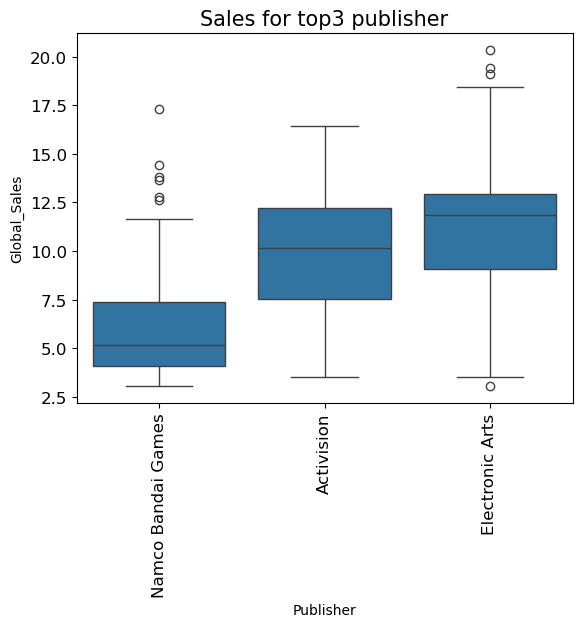

In [39]:
sns.boxplot(x='Publisher', y='Global_Sales', data=top3_data)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Sales for top3 publisher', fontsize=15)
plt.show()

**What can we infer from this plot?**

- The overall sales of EA is higher, with a much larger spread than other publishers.
- Activision doesn't have many outliers.
  - If you notice, even though the spread is lesser than EA, the median is almost the same.

---

### Bar Plot

**What if we want to compare the sales between the genres?**

We have to use:
- Genre (categorical)
- Mean of global sales per genre (numerical)

**How to visualize which genres bring higher average global sales?**

<Axes: xlabel='Genre', ylabel='Global_Sales'>

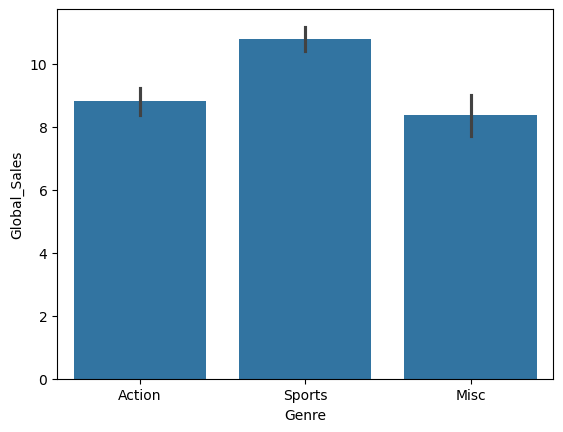

In [40]:
sns.barplot(data=top3_data, x="Genre", y="Global_Sales", estimator=np.mean)

**What can we infer from this plot?**

- If you remember, we had earlier seen EA had a larger market share of sales.
- Along with this fact, majority of games EA made was sports.
- This ultimately proves the fact that Sports has a high market share in the industry, as shown in the bar chart.

---

## Subplots

So far we have **shown only 1 plot** using `plt.show()`.

Let's say we want to plot the trend of NA and every other region separately in a single figure.

**How can we plot multiple smaller plots at the same time?**

We will use **subplots**, i.e., **divide the figure into smaller plots**.

- We will be using `plt.subplots()`
- It mainly takes 2 arguments -
  1. **No. of rows** we want to **divide our figure** into.
  2. **No. of columns** we want to **divide our figure** into.
- It returns
  - Figure
  - Numpy matrix of subplots

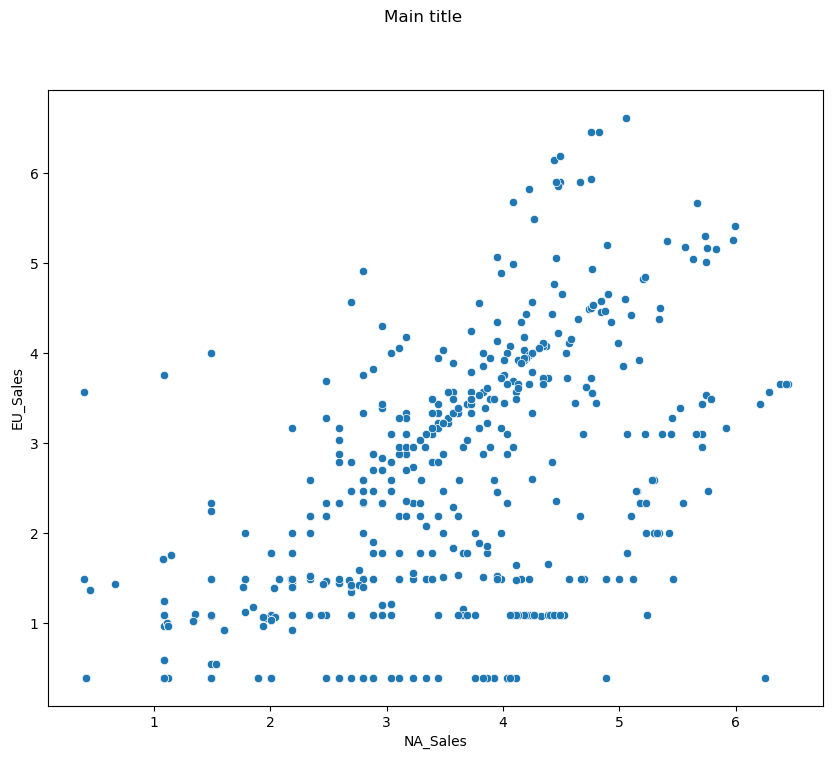

In [41]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x=top3_data['NA_Sales'], y=top3_data['EU_Sales'])
fig.suptitle('Main title')
plt.show()

Text(0.5, 0.98, 'Main title')

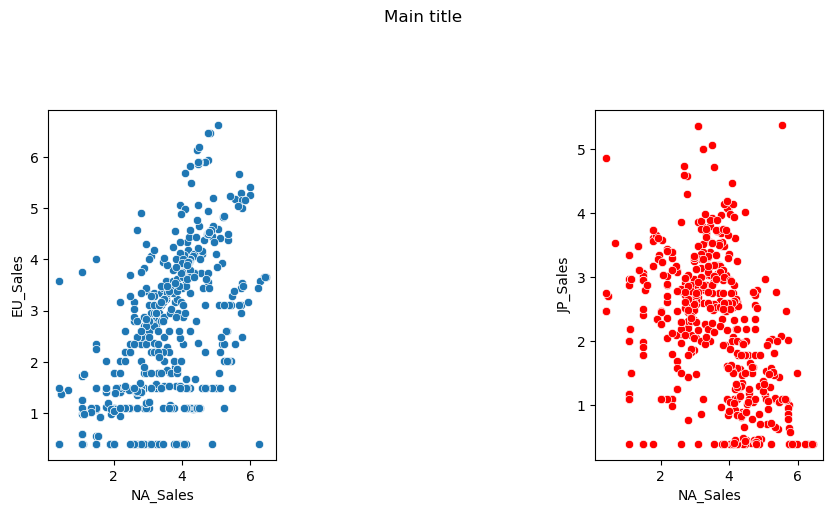

In [42]:
fig = plt.figure(figsize=(10,10))

plt.subplot(2, 3, 1)
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=top3_data)

plt.subplot(2, 3, 3)
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=top3_data, color='red')

fig.suptitle('Main title')

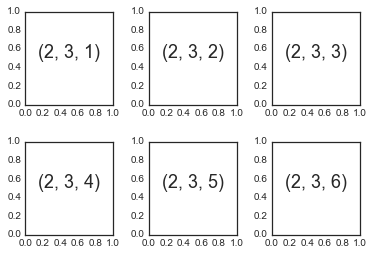

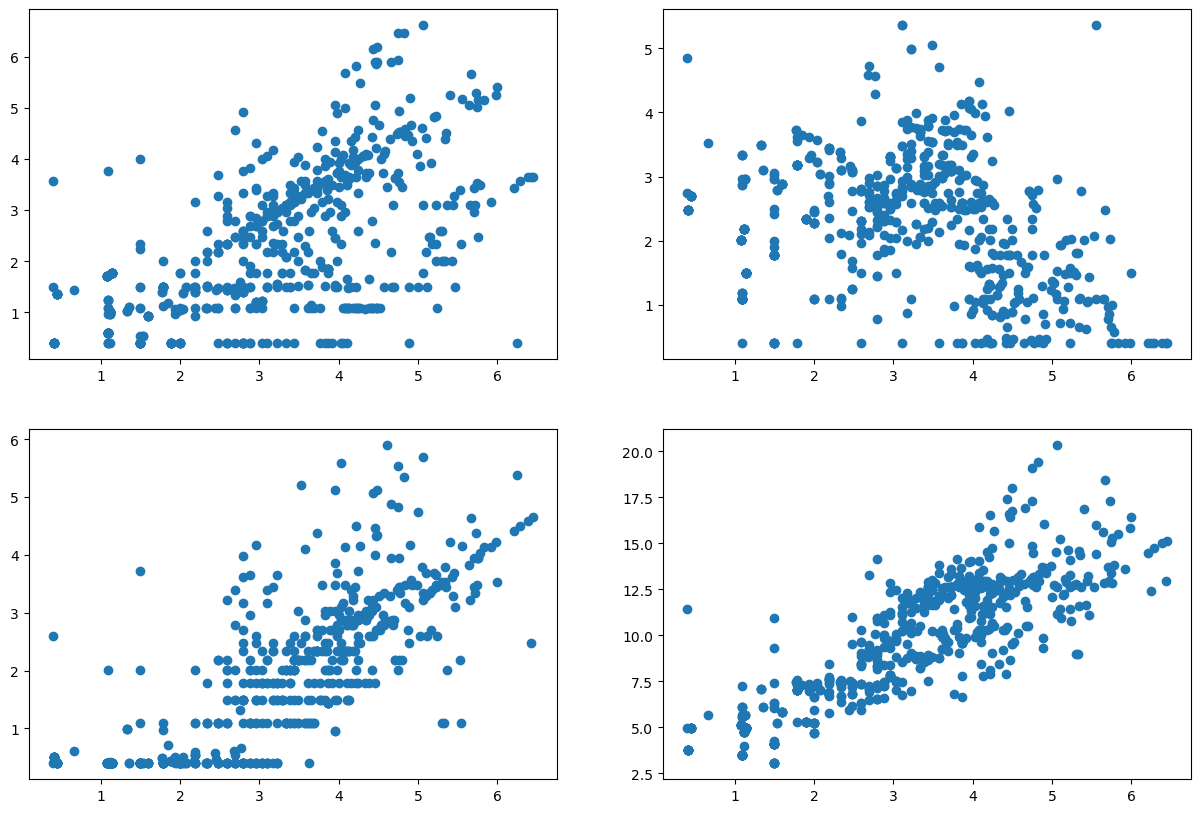

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

ax[0,0].scatter(top3_data['NA_Sales'], top3_data['EU_Sales'])
ax[0,1].scatter(top3_data['NA_Sales'], top3_data['JP_Sales'])
ax[1,0].scatter(top3_data['NA_Sales'], top3_data['Other_Sales'])
ax[1,1].scatter(top3_data['NA_Sales'], top3_data['Global_Sales'])

Notice that we are using 2 numbers during each plotting.

Think of subplots as a `2x2 grids`, with the two numbers denoting `x,y`/`row,column` coordinate of each subplot.

**What is this `ax` parameter exactly?**

In [44]:
print(ax)

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


It's a `2x2 matrix` of multiple axes objects.

We are plotting each plot on a single `axes` object.

Hence, we are using a 2D notation to access each grid/axes object of the subplot.

Instead of accesing the individual axes using `ax[0, 0]`, `ax[1, 0]`, there is another method we can use too.

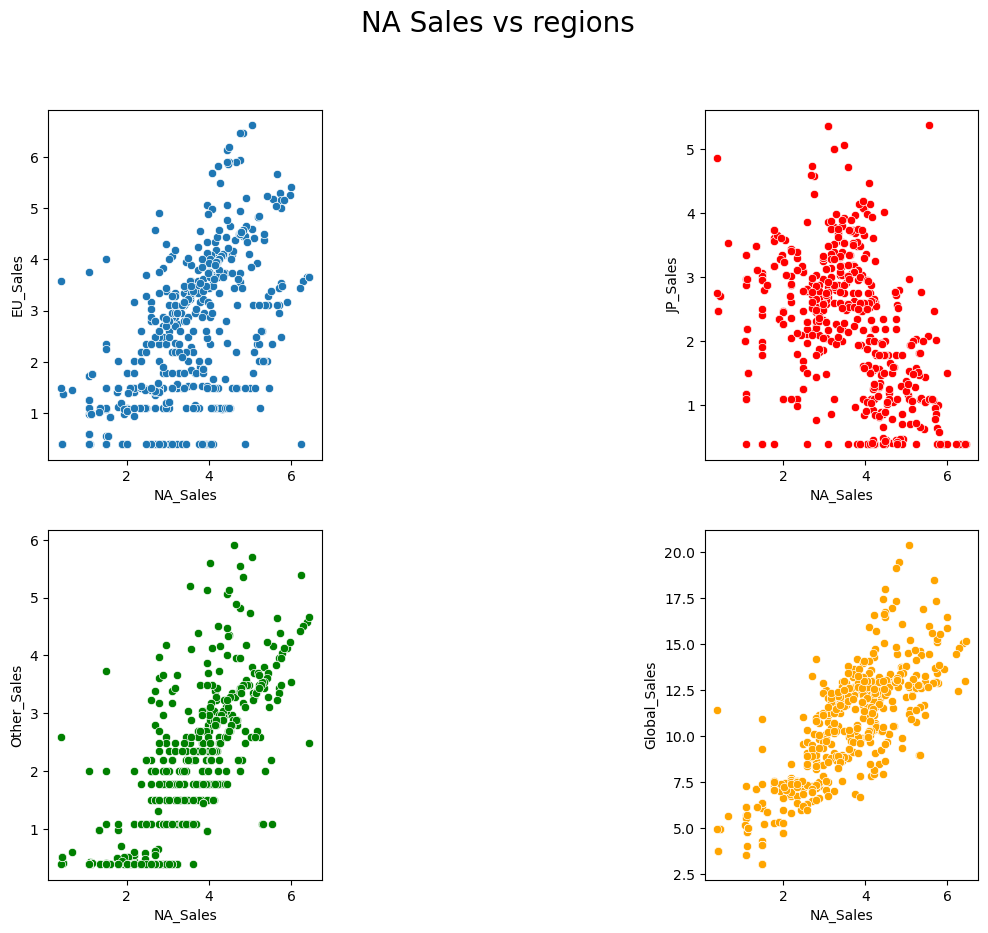

In [45]:
plt.figure(figsize=(12,10)).suptitle("NA Sales vs regions",fontsize=20)

# using a 2x3 subplot
plt.subplot(2, 3, 1)
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=top3_data)

plt.subplot(2, 3, 3)
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=top3_data, color='red')

plt.subplot(2, 3, 4)
sns.scatterplot(x='NA_Sales', y='Other_Sales', data=top3_data, color='green')

plt.subplot(2, 3, 6)
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=top3_data, color='orange')

plt.show()

`Suptitle` adds a title to the whole figure.

**We need to observe a few things here -**

1. The 3rd paramter defines the position of the plot.
2. The position/numbering starts from 1.
3. It goes on row-wise from start of row to its finish.
4. Empty subplots don't show any axes.

**But how do we know which plot belongs to which category?**

- Basically the context of each plot.

We can use `title`, `x/y label` and every other functionality for the subplots too.


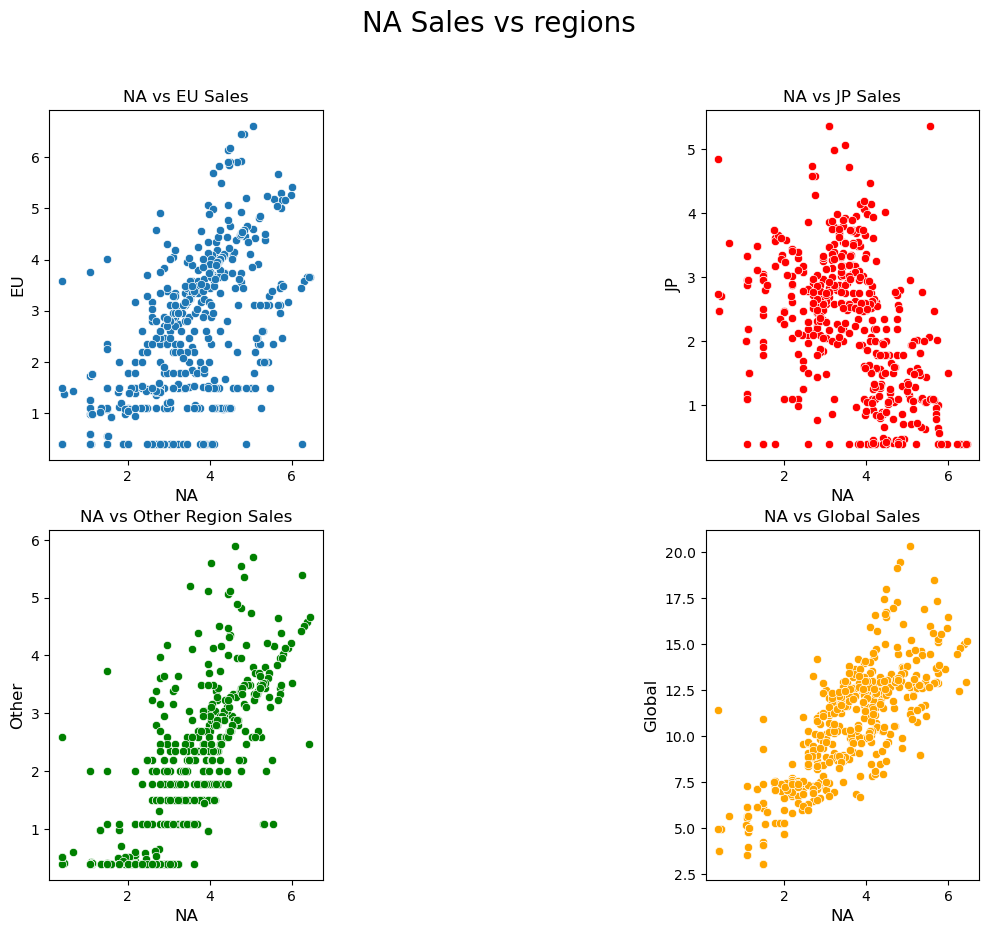

In [46]:
plt.figure(figsize=(12,10)).suptitle("NA Sales vs regions",fontsize=20)

# using a 2x3 subplot
plt.subplot(2, 3, 1)
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=top3_data)
plt.title('NA vs EU Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('EU', fontsize=12)

plt.subplot(2, 3, 3)
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=top3_data, color='red')
plt.title('NA vs JP Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('JP', fontsize=12)

plt.subplot(2, 3, 4)
sns.scatterplot(x='NA_Sales', y='Other_Sales', data=top3_data, color='green')
plt.title('NA vs Other Region Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('Other', fontsize=12)

plt.subplot(2, 3, 6)
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=top3_data, color='orange')
plt.title('NA vs Global Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('Global', fontsize=12)

plt.show()

**What if we want to span a plot across the full length of the plot?**

- Think of this in **terms of a grid**.
- Currently we are **dividing our plot into 2 rows and 3 columns**.
- But we want our plot to be across the middle column, with **grids 2 and 5**.
- This can be said as a **single column**.

So this problem can be simplified to plotting the plot across **second column in a 1 row 3 column subplot**.

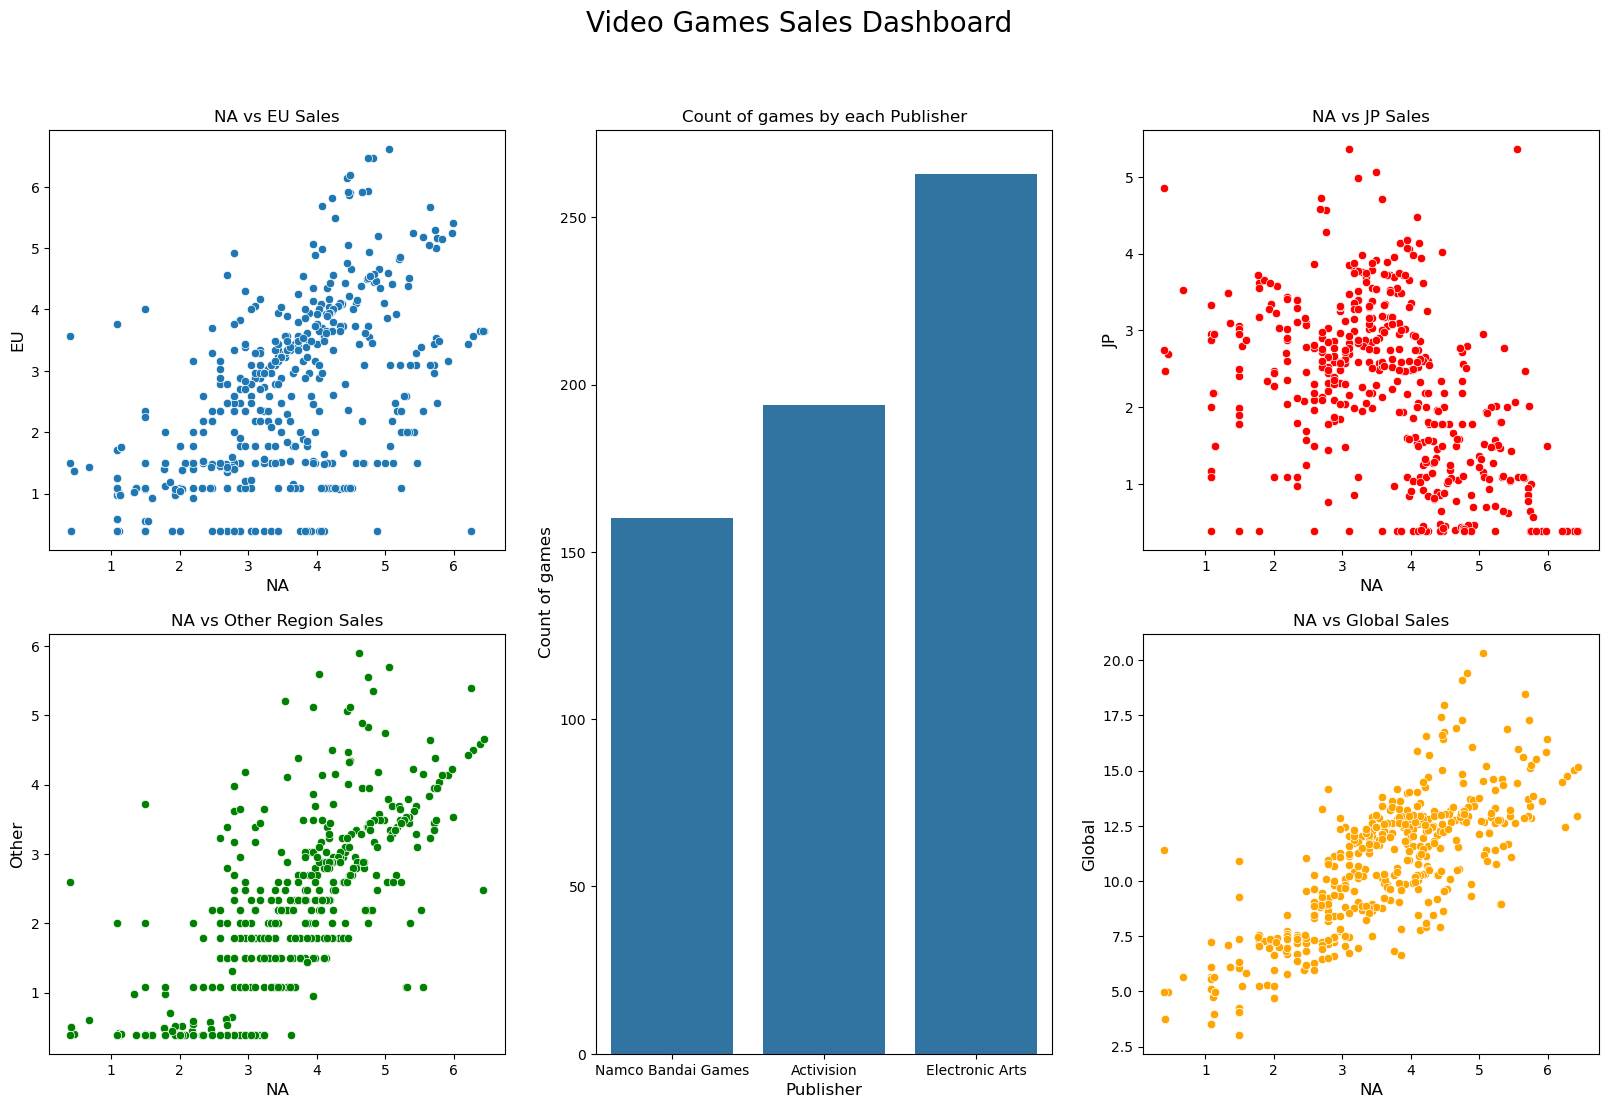

In [47]:
plt.figure(figsize=(20,12)).suptitle("Video Games Sales Dashboard",fontsize=20)

# using a 2x3 subplot
plt.subplot(2, 3, 1)
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=top3_data)
plt.title('NA vs EU Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('EU', fontsize=12)

plt.subplot(2, 3, 3)
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=top3_data, color='red')
plt.title('NA vs JP Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('JP', fontsize=12)

# Countplot of publishers
plt.subplot(1,3,2)
sns.countplot(x='Publisher', data=top3_data)
plt.title('Count of games by each Publisher', fontsize=12)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Count of games', fontsize=12)

plt.subplot(2, 3, 4)
sns.scatterplot(x='NA_Sales', y='Other_Sales', data=top3_data, color='green')
plt.title('NA vs Other Region Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('Other', fontsize=12)

plt.subplot(2, 3, 6)
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=top3_data, color='orange')
plt.title('NA vs Global Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('Global', fontsize=12)

plt.show()

---

### **Question-1**

Q. For the company "Toyota", we want to find which type of vehicle has made the maximum sales.

Which plot we will prefer to use here?

```
a. Bar Plot
b. Pie Chart
c. Boxplot
d. Line Plot
```

Answer: Bar Plot

Explanation:

A bar plot is ideal for comparing the quantities of different categories or groups, making it suitable for visualizing sales data across different types of vehicles. Each type of vehicle can be represented on the x-axis, while the sales quantity (or revenue) can be represented on the y-axis. This allows for a clear comparison of sales performance among different vehicle types, making it easy to identify which type has made the maximum sales.

---

### **Question-2**

Q. Apple wanted to conduct an analysis and find the relationship between price and number of units sold for it's products.

Which of the following plots would you prefer?
  
```
a. Scatter Plot
b. Pie Chart
c. Boxplot
d. Line Plot
```

Answer: Scatter Plot

Explanation:

A scatter plot is specifically designed for visualizing the relationship between two continuous variables. In this case, you can plot the price of the products on the x-axis and the corresponding number of units sold on the y-axis. Each data point represents a product, with its price and the corresponding number of units sold. By examining the distribution of points on the plot, you can discern any patterns or trends in the relationship between price and sales volume for Apple products.

---